## Question 1
1) The probability that the first bootstrap observation is not the jth observation from the original sample is given by the probability that the jth observation is not selected in the bootstrap sample. Since each observation has an equal probability of being selected (with replacement), the probability that the jth observation is not selected in one draw is (1 - 1/n). Therefore, the probability that it is not selected in n draws (i.e., in the bootstrap sample) is (1 - 1/n)^n.

2) Similarly, the probability that the second bootstrap observation is not the jth observation from the original sample is also (1 - 1/n)^n. This is because each draw from the bootstrap sample is independent, so the probability of not selecting the jth observation in the second draw is the same as in the first draw.

3) The probability that the jth observation is not in the bootstrap sample is (1 - 1/n) in one draw. Since each draw is independent, the probability that the jth observation is not selected in any of the n draws is (1 - 1/n)^n.

4) When n=5, the probability that the jth observation is in the bootstrap sample is 1 - (1 - 1/5)^5 ≈ 0.6723.

5) When n=100, the probability that the jth observation is in the bootstrap sample is 1 - (1 - 1/100)^100 ≈ 0.634.

6) When n=10000, the probability that the jth observation is in the bootstrap sample is 1 - (1 - 1/10000)^10000 ≈ 0.6321.

7) To create a plot showing how the probability that the jth observation is in the bootstrap sample changes as n increases from 1 to 10000, you can use the formula (1 - 1/n)^n. You'll need to write code to calculate this probability for each value of n and tg this plot.

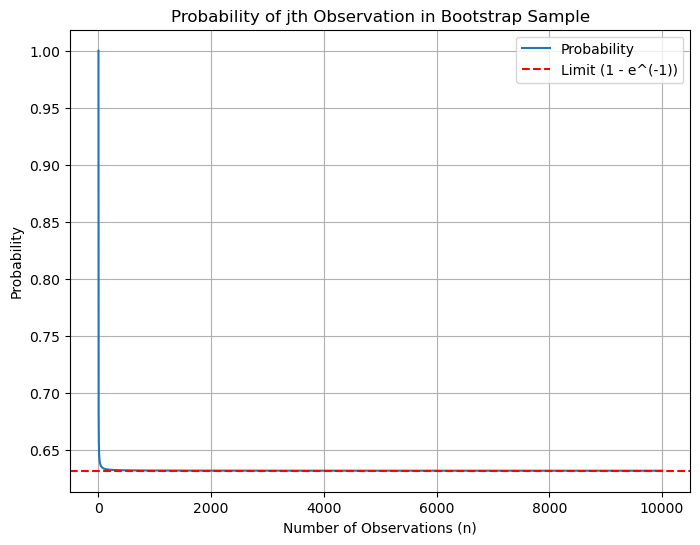

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability function
def probability(n):
    return (1 - 1/n)**n

# Create an array of n values from 1 to 10,000
n_values = np.arange(1, 10001)

# Calculate the probabilities for each n
probabilities = 1 - probability(n_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(n_values, probabilities, label="Probability")
plt.axhline(y=1 - np.exp(-1), color='r', linestyle='--', label="Limit (1 - e^(-1))")
plt.xlabel("Number of Observations (n)")
plt.ylabel("Probability")
plt.title("Probability of jth Observation in Bootstrap Sample")
plt.legend()
plt.grid(True)
plt.show()


## Question 2
First note that both K-fold and LOOVC are types of cross validation
a. K-fold cross-validation is implemented by splitting the dataset into k equal-sized folds. The model is trained k times, each time using k-1 folds as training data and the remaining fold as validation data. The performance of the model is then evaluated by averaging the performance metrics (e.g., accuracy, error) obtained from each of the k iterations. This process ensures that each data point is used for validation exactly once.
 a step-by-step explanation of how k-fold cross-validation is implemented:
1. Divide the dataset into k equal-sized folds.
2. For each fold:
   a. Use k-1 folds as training data.
   b. Use the remaining fold as validation data.
   c. Train the model on the training data.
   d. Evaluate the model's performance on the validation data.
3. Calculate the average performance metric across all k folds to obtain the cross-validation estimate of the model's performance.

b. Advantages and disadvantages of k-fold cross-validation relative to LOOCV:

Advantages:
- More efficient use of data: In k-fold cross-validation, each data point is used for both training and validation, which can lead to a more reliable estimate of the model's performance compared to LOOCV.
- Reduced bias: Since the model is trained on multiple folds of the data, the estimated performance metric is less biased compared to LOOCV, which can sometimes overestimate the true performance of the model.
- Computational efficiency: K-fold cross-validation is computationally less expensive than LOOCV, especially for large datasets, as it requires fitting the model k times instead of n times.

Disadvantages:
- Variability: The performance estimates obtained from k-fold cross-validation can have higher variability compared to LOOCV, especially when the dataset is small or when the folds are not representative of the overall dataset.
- Higher computational cost: Although k-fold cross-validation is computationally less expensive than LOOCV for large datasets, it still requires fitting the model multiple times, which can be time-consuming for complex models or large values of k.
- Parameter tuning: K-fold cross-validation may require tuning the value of k, which can introduce additional complexity and require additional computational resources.

## Question 3
Using the provided expresion
Gini Index: $$ G = 2\hat{p}{m1}\hat{p}{m2}$$
Classification Error: $$ (E = 1 - \max(\hat{p}{mk}, 1 - \hat{p}{mk})) $$
Entropy: $$( D = -\hat{p}{mk}\log_2(\hat{p}{mk}) - (1 - \hat{p}{mk})\log_2(1 - \hat{p}{mk}) ) $$

C:\Users\ourau\AppData\Local\Temp\ipykernel_23740\2580669064.py:12: RuntimeWarning: divide by zero encountered in log2
  return -(p_mk * np.log2(p_mk) + (1 - p_mk) * np.log2(1 - p_mk))
C:\Users\ourau\AppData\Local\Temp\ipykernel_23740\2580669064.py:12: RuntimeWarning: invalid value encountered in multiply
  return -(p_mk * np.log2(p_mk) + (1 - p_mk) * np.log2(1 - p_mk))


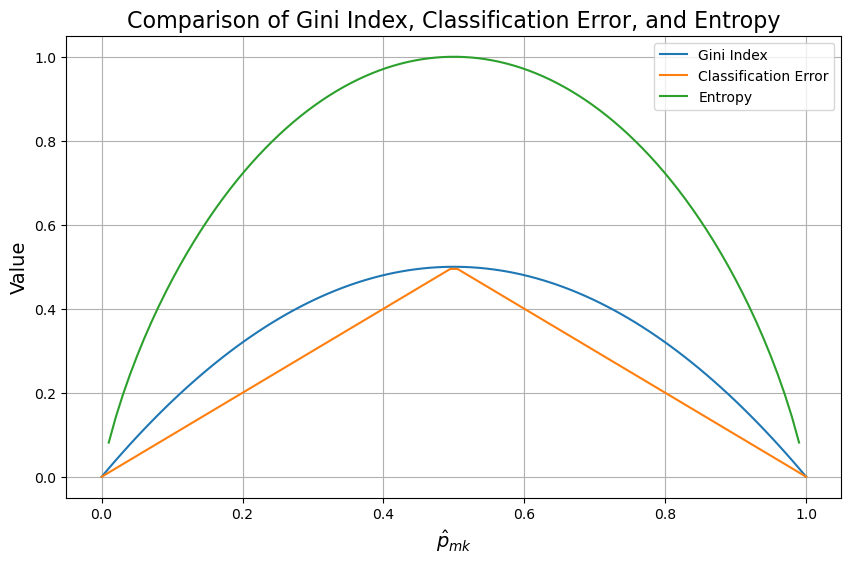

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions for Gini index, classification error, and entropy
def gini_index(p_mk):
    return 2 * p_mk * (1 - p_mk)

def classification_error(p_mk):
    return 1 - np.maximum(p_mk, 1 - p_mk)

def entropy(p_mk):
    return -(p_mk * np.log2(p_mk) + (1 - p_mk) * np.log2(1 - p_mk))

# Generate range of p_mk values
p_mk_values = np.linspace(0, 1, 100)

# Calculate Gini index, classification error, and entropy for each p_mk value
gini_values = gini_index(p_mk_values)
error_values = classification_error(p_mk_values)
entropy_values = entropy(p_mk_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_mk_values, gini_values, label='Gini Index')
plt.plot(p_mk_values, error_values, label='Classification Error')
plt.plot(p_mk_values, entropy_values, label='Entropy')
plt.xlabel('$\hat{p}_{mk}$', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Comparison of Gini Index, Classification Error, and Entropy', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


## Question 4
Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of XXX, produce 10 estimates of $$ P(Class=Green∣X)P(\text{Class} = \text{Green} | X)P(Class=Green∣X) $$
[0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]

There are two common ways to combine these results together to produce a single class prediction. One is the majority vote approach, where the most commonly occurring class is predicted. The other is the average probability approach, where the average of the estimated probabilities is taken.
In this example, what is the final prediction under each of these two approaches?

In [9]:
Prob = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]
Prob_mean = sum(Prob)/len(Prob)
print(Prob_mean)

0.45


Under the majority vote approach, we simply predict the class that occurs most frequently among the 10 estimates of \( P(\text{Class} = \text{Green} | X) \)
We can see that the class "Green" occurs 6 times out of 10, making it the most common class. Therefore, under the majority vote approach, the final prediction would be "Green".

Under the average probability approach, we take the average of the estimated probabilities: 0.45

Since this average probability is less than 0.5, we would predict the class "Not Green" using the average probability.

## Question 5
This is a semi report of your project. You need to write a brief summary of your project and the steps you have taken so far.<br>
If you choose the project 1, you need to write

1. how you have split the data,
2. what models you have used,
3. what are the results of your models,
4. how you process the grid search,
5. and what are the best parameters you have found.

Also, you need to write what you are planning to do next.
If you choose the project 2, you need to write how you understand the method, what you have done so far, and what you are planning to do next.

### Answers
Currently I am reading a Machine laernig paper <br>
AGL-Score: Algebraic Graph Learning Score for Protein−Ligand Binding Scoring, Ranking, Docking, and Screening<br>
I have managed to down load the data set and am woring on how to load alll the data set in the folder<br>
Since in my case the data set are different interms of format, they are in folders not csv.<br>
2. I am planing to train using GBT(Gradient boosting Trees) <br>
3. I have not yet run any model except for loading one protein data<br>
4. According to the paper , I am supposed to use some specific paremeter and also use 5 Fold cross validation to tune <br>
τ {0.5,1.0,...,6}<br>
β {0.5,1.0,...,6}∪{10,15,20} <br>
M {Adj,Lap,Inv}<br>
5.For me this question is yet to be answered<br>